# Exploratory data analysis 


This notebook follows adapt_dataset.ipynb, and aims to explore the dataset used for the project.

In [1]:
# Imports

#!pip install pylabel
from pylabel import importer
import pandas as pd
from IPython.display import Image, display
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load trainset (which is in the VOC format)
print("Loading dataset...")
# the ../../ in path_to_images is to counter an issue in the library pylabel that have not fixed yet.
train_set = importer.ImportVOC(path="images/train", path_to_images="../../images/train", name="cyclist_dataset_train") 
print("Train set loaded")
test_set = importer.ImportVOC(path="images/test", path_to_images="../../images/test", name="cyclist_dataset_test") 
print("Test set loaded")
validation_set = importer.ImportVOC(path="images/validation", path_to_images="../../images/validation", name="cyclist_dataset_validation") 
print("Validation set loaded")

Loading dataset...
Train set loaded
Test set loaded
Validation set loaded


In [3]:
# Just for reference, print how a label looks in the VOC format:
!cat images/validation/000202.xml

<?xml version="1.0" ?>
<annotation>
	<filename>000202.jpg</filename>
	<size>
		<width>2048</width>
		<height>1024</height>
		<depth>3</depth>
	</size>
	<object>
		<name>cyclist</name>
		<pose/>
		<truncated/>
		<difficult/>
		<bndbox>
			<xmin>1223</xmin>
			<xmax>1269</xmax>
			<ymin>402</ymin>
			<ymax>486</ymax>
		</bndbox>
	</object>
	<object>
		<name>cyclist</name>
		<pose/>
		<truncated/>
		<difficult/>
		<bndbox>
			<xmin>986</xmin>
			<xmax>1020</xmax>
			<ymin>420</ymin>
			<ymax>480</ymax>
		</bndbox>
	</object>
</annotation>


The label contains the name of the image, the size of the image and its depth (color channel). Then for each objects in the image (here only 2 cyclists) we have the name of the class, some empty fields (pose truncated and difficult are not given in our dataset), and then the bounding box which contains the xmin,ymin,xmax,ymax coordinates of the bounding box. 

In [4]:
# Extract dataframe 
traindf = train_set.df
testdf = test_set.df
valdf = validation_set.df

dataset = pd.concat([traindf,testdf,valdf])

In [5]:
dataset.sample(5)

img_folder img_filename img_path  img_id  img_width  \
id                                                                   
1360    ../../images/test   013588.jpg      NaN    1494       2048   
1502   ../../images/train   013582.jpg      NaN    1646       2048   
2995   ../../images/train   010053.jpg      NaN    3277       2048   
15220  ../../images/train   009838.jpg      NaN   16657       2048   
17409  ../../images/train   004693.jpg      NaN   18991       2048   

       img_height img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ...  \
id                                                                       ...   
1360         1024         3                       1290.0          317.0  ...   
1502         1024         3                       1286.0          315.0  ...   
2995         1024         3                        100.0          389.0  ...   
15220        1024         3                        730.0          377.0  ...   
17409        1024         3                       1630.0          365.0  ...   

       ann_segmentation  ann_iscrowd  ann_pose  ann_truncated  ann_difficult  \
id                                                                             
1360                NaN          NaN      None           None           None   
1502                NaN          NaN      None           None           None   
2995                NaN          NaN      None           None           None   
15220               NaN          NaN      None           None           None   
17409               NaN          NaN      None           None           None   

      cat_id cat_name cat_supercategory split annotated  
id                                                       
1360       0  cyclist               NaN               1  
1502       0  cyclist               NaN               1  
2995       0  cyclist               NaN               1  
15220      0  cyclist               NaN               1  
17409      0  cyclist               NaN               1  

[5 rows x 25 columns]

In [6]:
dataset.columns

Index(['img_folder', 'img_filename', 'img_path', 'img_id', 'img_width',
       'img_height', 'img_depth', 'ann_segmented', 'ann_bbox_xmin',
       'ann_bbox_ymin', 'ann_bbox_xmax', 'ann_bbox_ymax', 'ann_bbox_width',
       'ann_bbox_height', 'ann_area', 'ann_segmentation', 'ann_iscrowd',
       'ann_pose', 'ann_truncated', 'ann_difficult', 'cat_id', 'cat_name',
       'cat_supercategory', 'split', 'annotated'],
      dtype='object')

The library pylabel allows to load information about the dataset into a dataframe. This dataframe is generic for different type of dataset and different fromat, which explains why some columns are equal to None or Nan (for example ann_segmented is relevant only for segmentation tasks dataset. Let's drop the columns that are not relevant.

In [7]:
dataset = dataset.dropna(axis=1)
dataset.sample(5)

img_folder img_filename  img_id  img_width  img_height  \
id                                                                      
8570   ../../images/train   013624.jpg    9387       2048        1024   
2951   ../../images/train   000326.jpg    3222       2048        1024   
17647  ../../images/train   001840.jpg   19232       2048        1024   
7926   ../../images/train   001438.jpg    8669       2048        1024   
6606   ../../images/train   007849.jpg    7246       2048        1024   

      img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ann_bbox_xmax  \
id                                                                           
8570          3                       1334.0          398.0         1355.0   
2951          3                         21.0          423.0           50.0   
17647         3                        359.0          394.0          424.0   
7926          3                       1035.0          324.0         1166.0   
6606          3                        571.0          366.0          671.0   

       ann_bbox_ymax  ann_bbox_width  ann_bbox_height  ann_area cat_id  \
id                                                                       
8570           457.0            21.0             59.0    1239.0      0   
2951           498.0            29.0             75.0    2175.0      0   
17647          569.0            65.0            175.0   11375.0      0   
7926           683.0           131.0            359.0   47029.0      0   
6606           643.0           100.0            277.0   27700.0      0   

      cat_name split  annotated  
id                               
8570   cyclist                1  
2951   cyclist                1  
17647  cyclist                1  
7926   cyclist                1  
6606   cyclist                1

In [8]:
# We see that ann_segmented, and split remains let's see why
print(dataset.ann_segmented.unique())
print(dataset.split.unique())

['']
['']


In [9]:
# Drop these column which is not relevant for us, it contains empty string at some point.
dataset = dataset.drop(columns=["ann_segmented","split"])

In [10]:
dataset.sample(5)

img_folder img_filename  img_id  img_width  img_height  \
id                                                                      
4721   ../../images/train   001608.jpg    5176       2048        1024   
15576  ../../images/train   011049.jpg   17079       2048        1024   
17824  ../../images/train   006621.jpg   19455       2048        1024   
16194  ../../images/train   011117.jpg   17703       2048        1024   
3828   ../../images/train   001065.jpg    4199       2048        1024   

      img_depth  ann_bbox_xmin  ann_bbox_ymin  ann_bbox_xmax  ann_bbox_ymax  \
id                                                                            
4721          3         1276.0          363.0         1310.0          463.0   
15576         3          296.0          329.0          411.0          626.0   
17824         3         1169.0          374.0         1198.0          457.0   
16194         3          792.0          386.0          838.0          510.0   
3828          3          891.0          412.0          919.0          481.0   

       ann_bbox_width  ann_bbox_height  ann_area cat_id cat_name  annotated  
id                                                                           
4721             34.0            100.0    3400.0      0  cyclist          1  
15576           115.0            297.0   34155.0      0  cyclist          1  
17824            29.0             83.0    2407.0      0  cyclist          1  
16194            46.0            124.0    5704.0      0  cyclist          1  
3828             28.0             69.0    1932.0      0  cyclist          1

The collumns corresponds to:
- img_folder: the path of the corresponding image
- img_filename: the name of the corresponding image
- img_path: not used here, but this field can be useful for some format of dataset. For the VOC format, this field is not used.
- img_id: an id given by pylabel to the image
- img_width: the width of the images
- img_height: the height of the images
- img_depth: the color channel of the images
- ann_bbox_xmin: the minimum x coordinate of a bounding boxe in the image
- ann_bbox_ymin: the minimum y coordinate of a bounding boxe in the image
- ann_bbox_xmax: the maximum x coordinate of a bounding boxe in the image
- ann_bbox_ymax: the maximum y coordinate of a bounding boxe in the image 
- ann_bbox_width: the maximum bounding box width in the image
- ann_bbox_height: the maximum bounding box height in the image
- ann_area: the maximum area of the bounding boxes
- cat_id: contains the category ID (here only 0 as we only have one category, one class
- cat_name: the name of the class, only cyclist here
- annotated: 1 if the image is annoted, 0 if not

**Note:** This dataframe whill contains many duplicates of the images because one row corresponds to one bounding box (one label). So if an image contains 3 bounding boxes of cyclists, then 3 rows will have the same filename because it's the same image.

Let's perform more general analysis on the dataset:

In [11]:
print("Training set:")
print(f"Number of images: {train_set.analyze.num_images}")
print(f"Number of classes: {train_set.analyze.num_classes}")
print(f"Classes:{train_set.analyze.classes}\n")
print("Test set:")
print(f"Number of images: {test_set.analyze.num_images}")
print(f"Number of classes: {test_set.analyze.num_classes}")
print(f"Classes:{test_set.analyze.classes}\n")
print("Validation set:")
print(f"Number of images: {validation_set.analyze.num_images}")
print(f"Number of classes: {validation_set.analyze.num_classes}")
print(f"Classes:{validation_set.analyze.classes}\n")

Training set:
Number of images: 9760
Number of classes: 1
Classes:['cyclist']

Test set:
Number of images: 1206
Number of classes: 1
Classes:['cyclist']

Validation set:
Number of images: 1085
Number of classes: 1
Classes:['cyclist']



So we have only one class in our dataset: cyclist. And a total of 9760+1206+1085=12051 images in our dataset.

Let's get back to the dataframe to explore some informations a bit more.

In [12]:
print(f"Unique values of img_width: {dataset.img_width.unique()}")
print(f"Unique values of img_height: {dataset.img_height.unique()}")
print(f"Unique values of img_height: {dataset.img_depth.unique()}")
print(f"Number of labels in the dataset: {len(dataset)}")

Unique values of img_width: [2048]
Unique values of img_height: [1024]
Unique values of img_height: ['3']
Number of labels in the dataset: 22173


All the 12051 images of the dataset have the same format. And there is 22173 bounding boxes of cyclists in this dataset.

In [13]:
dataset.ann_bbox_height.describe()

count    22173.000000
mean       199.586073
std        155.723956
min         17.000000
25%         83.000000
50%        139.000000
75%        285.000000
max        851.000000
Name: ann_bbox_height, dtype: float64

In [14]:
dataset.ann_bbox_width.describe()

count    22173.000000
mean        89.296081
std         83.542772
min          5.000000
25%         33.000000
50%         59.000000
75%        122.000000
max        840.000000
Name: ann_bbox_width, dtype: float64

The ann_bbox_width and ann_bbox_height (width and height of the bounding boxes) tends to have a large standard deviation (large vairance) with the minimum and maximum being far apart. This means that bounding boxes could be small, large, or medium depending on the image and distance from the cyclist to the camera. This can also be explained by the fact that the cyclist can be in two very different position from the camera:
* If the cyclist is driving in the same direction as where the camera points, then the width will be small (we see the back of the cyclist)
* If the cyclist is driving in a perpendicular direction to where the camera points, then the width will be large (we see the cyclist from its side)

There appears to be some notable outliers though, as the max is much larger than the 75th percentile and the min is much smaller than the 25th percentile. Let's visualize the image having a width of 840:

In [15]:
dataset.query("ann_bbox_width == 840")

img_folder img_filename  img_id  img_width  img_height  \
id                                                                      
17454  ../../images/train   003336.jpg   19037       2048        1024   

      img_depth  ann_bbox_xmin  ann_bbox_ymin  ann_bbox_xmax  ann_bbox_ymax  \
id                                                                            
17454         3          317.0          249.0         1157.0         1018.0   

       ann_bbox_width  ann_bbox_height  ann_area cat_id cat_name  annotated  
id                                                                           
17454           840.0            769.0  645960.0      0  cyclist          1

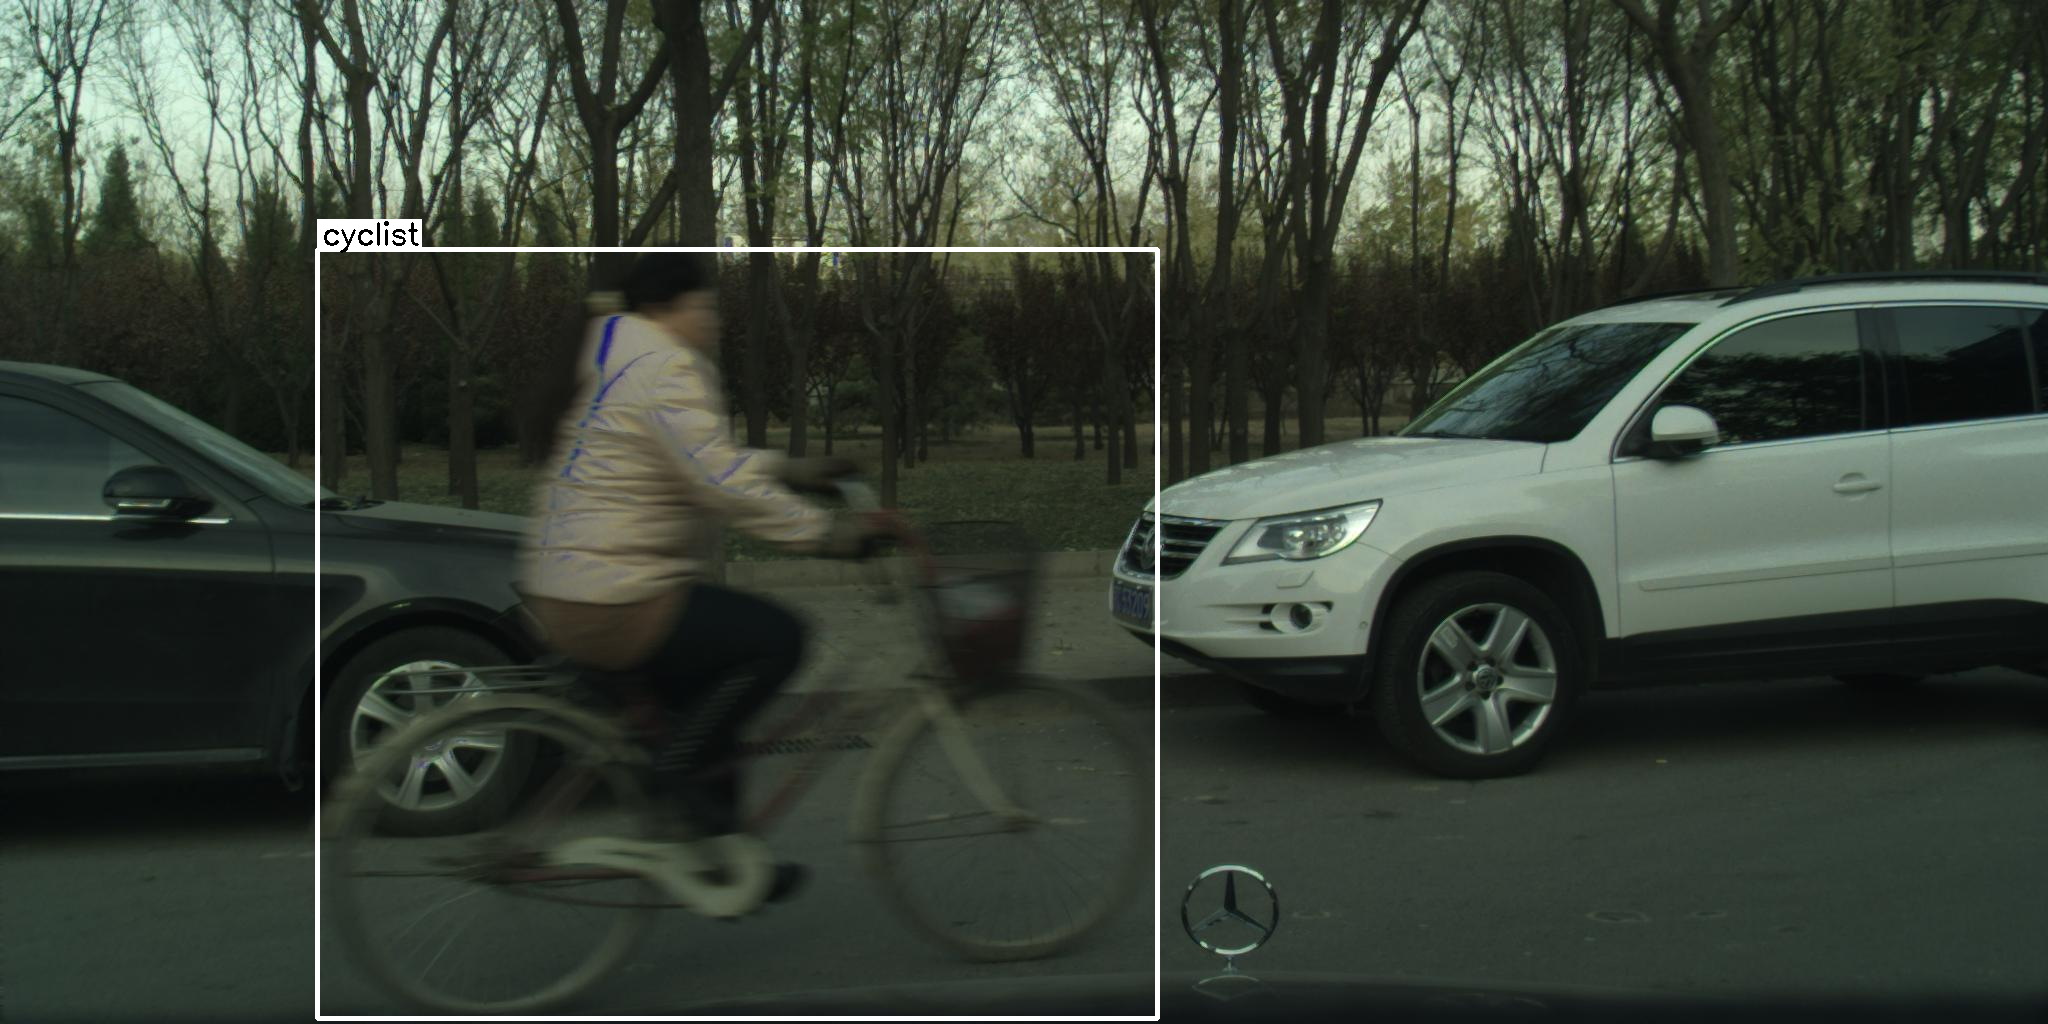

In [16]:
display(train_set.visualize.ShowBoundingBoxes(19037))

In the end, this can simply be explained because the cyclist was very close to the camera, in the side position.

Now let's explore the distribution of the positions of the bounding boxes.

<AxesSubplot:xlabel='ann_bbox_height', ylabel='Count'>

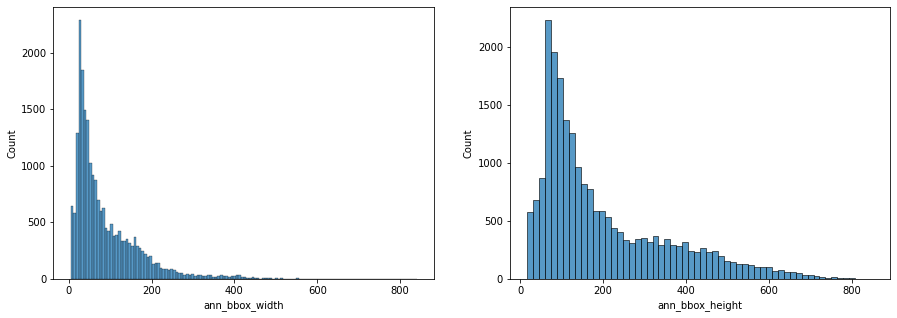

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(dataset.ann_bbox_width, ax=axes.flatten()[0])
sns.histplot(dataset.ann_bbox_height, ax=axes.flatten()[1])

The distribution of the width and the height of the bounding boxes is right skewed. Most of the bounding boxes have a low width (between 25 and 200px). The height of the bounding boxes is a bit more spread out. Thanks to the .describe() did previously, we can see that 75% of the bounding boxes have a height less than 285 (which is also small). This is very informative because it shows that a large percentage of the bounding boxes will be small-moderate. It means that a lot of images will contains cyclists that are far away from the camera, or at least not close by. Thus, we can suppose that our model will be better at recognizing cyclists that are not too close to the camera. After assing the results and testing the model in a real environement, we will probably be able to answer this question. In that case, the camera will have to be at a certain range from the road in order to detect the cyclists.

<AxesSubplot:xlabel='ann_bbox_ymin', ylabel='Count'>

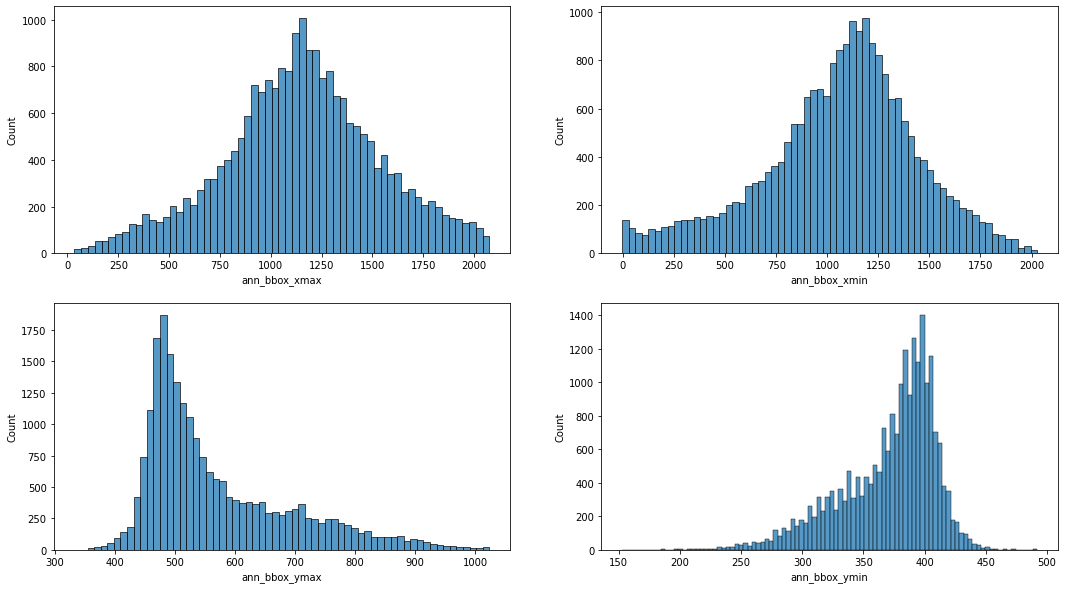

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(dataset.ann_bbox_xmax, ax=axes.flatten()[0])
sns.histplot(dataset.ann_bbox_xmin, ax=axes.flatten()[1])
sns.histplot(dataset.ann_bbox_ymax, ax=axes.flatten()[2])
sns.histplot(dataset.ann_bbox_ymin, ax=axes.flatten()[3])

The xmin and xmax of the bounding boxes looks normally distributed with some outliers. It means that in our dataset, most of the cyclist detected are present in the middle of the camera. Then for the ymin of the bounding boxes, we see that the distribution is right skewed with a maximum around y=500, which is the middle of the image as the height is 1024. Then for the ymin, the distribution is left skewed with a maximum around y=400, so the bottom of the bounding boxes is mostly present between 250 and 450, which is the bottom part of the image. To get a better idea of the distribution of the positions of the bounding boxes, let's look at the centroids of the bounding boxes.

Let's add some columns to the dataframe corresponding to the centroid of the bounding box:

In [19]:
dataset["x_center"] = (dataset["ann_bbox_xmax"] + dataset["ann_bbox_xmin"])/2
dataset["y_center"] = (dataset["ann_bbox_ymax"] + dataset["ann_bbox_ymin"])/2

Let's explore these centroids:

In [20]:
print("X coordinate of the centroid:")
display(dataset["x_center"].describe())
print("Y coordinate of the centroid:")
display(dataset["y_center"].describe())

X coordinate of the centroid:


count    22173.000000
mean      1104.442069
std        378.651119
min         22.500000
25%        885.000000
50%       1127.500000
75%       1347.000000
max       2037.500000
Name: x_center, dtype: float64

Y coordinate of the centroid:


count    22173.000000
mean       470.771749
std         45.744608
min        317.000000
25%        439.500000
50%        458.000000
75%        494.500000
max        666.000000
Name: y_center, dtype: float64

We see that a bounding box have an average centroid of (1104,470) which almost corresponds to the center of the image (1024,512). Let's visualize this with a violin plot:

<AxesSubplot:xlabel='y_center'>

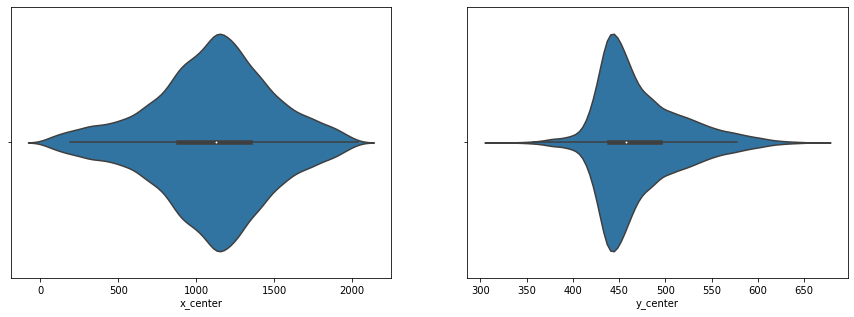

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot(x=dataset.x_center,ax=axes.flatten()[0])
sns.violinplot(x=dataset.y_center,ax=axes.flatten()[1])

These plots show the distribution of the the centroids (like an histogram) but also include the informations about the median, the first and third quartile. First, we can interpet the violinplot of x_center. The distribution is quite spread out similarly to a normal distribution. This means that the bounding boxes are mostly in the center, but still a large part of the bouding boxes are spread out on all the width of the image. In the contrary, the violinplot of y_center show that the values are more compressed between 400 and 600 px, so in the middle of the y axis. This is expected because if the camera is on the road level, every cyclists will be in front of the camera between an interval (here approximatively 400 and 600) around the road level (and not in the sky...). 

To counter the fact that a large part of the cyclists are in the middle of the image, we will use some data augmentation techniques (this is covered in the readme.md).

Now, we know better our dataset, and how the bounding boxes are distributed across the images. To finish with this exploration of our dataset, let's display an image from each of our sets.

Sample from Train set:


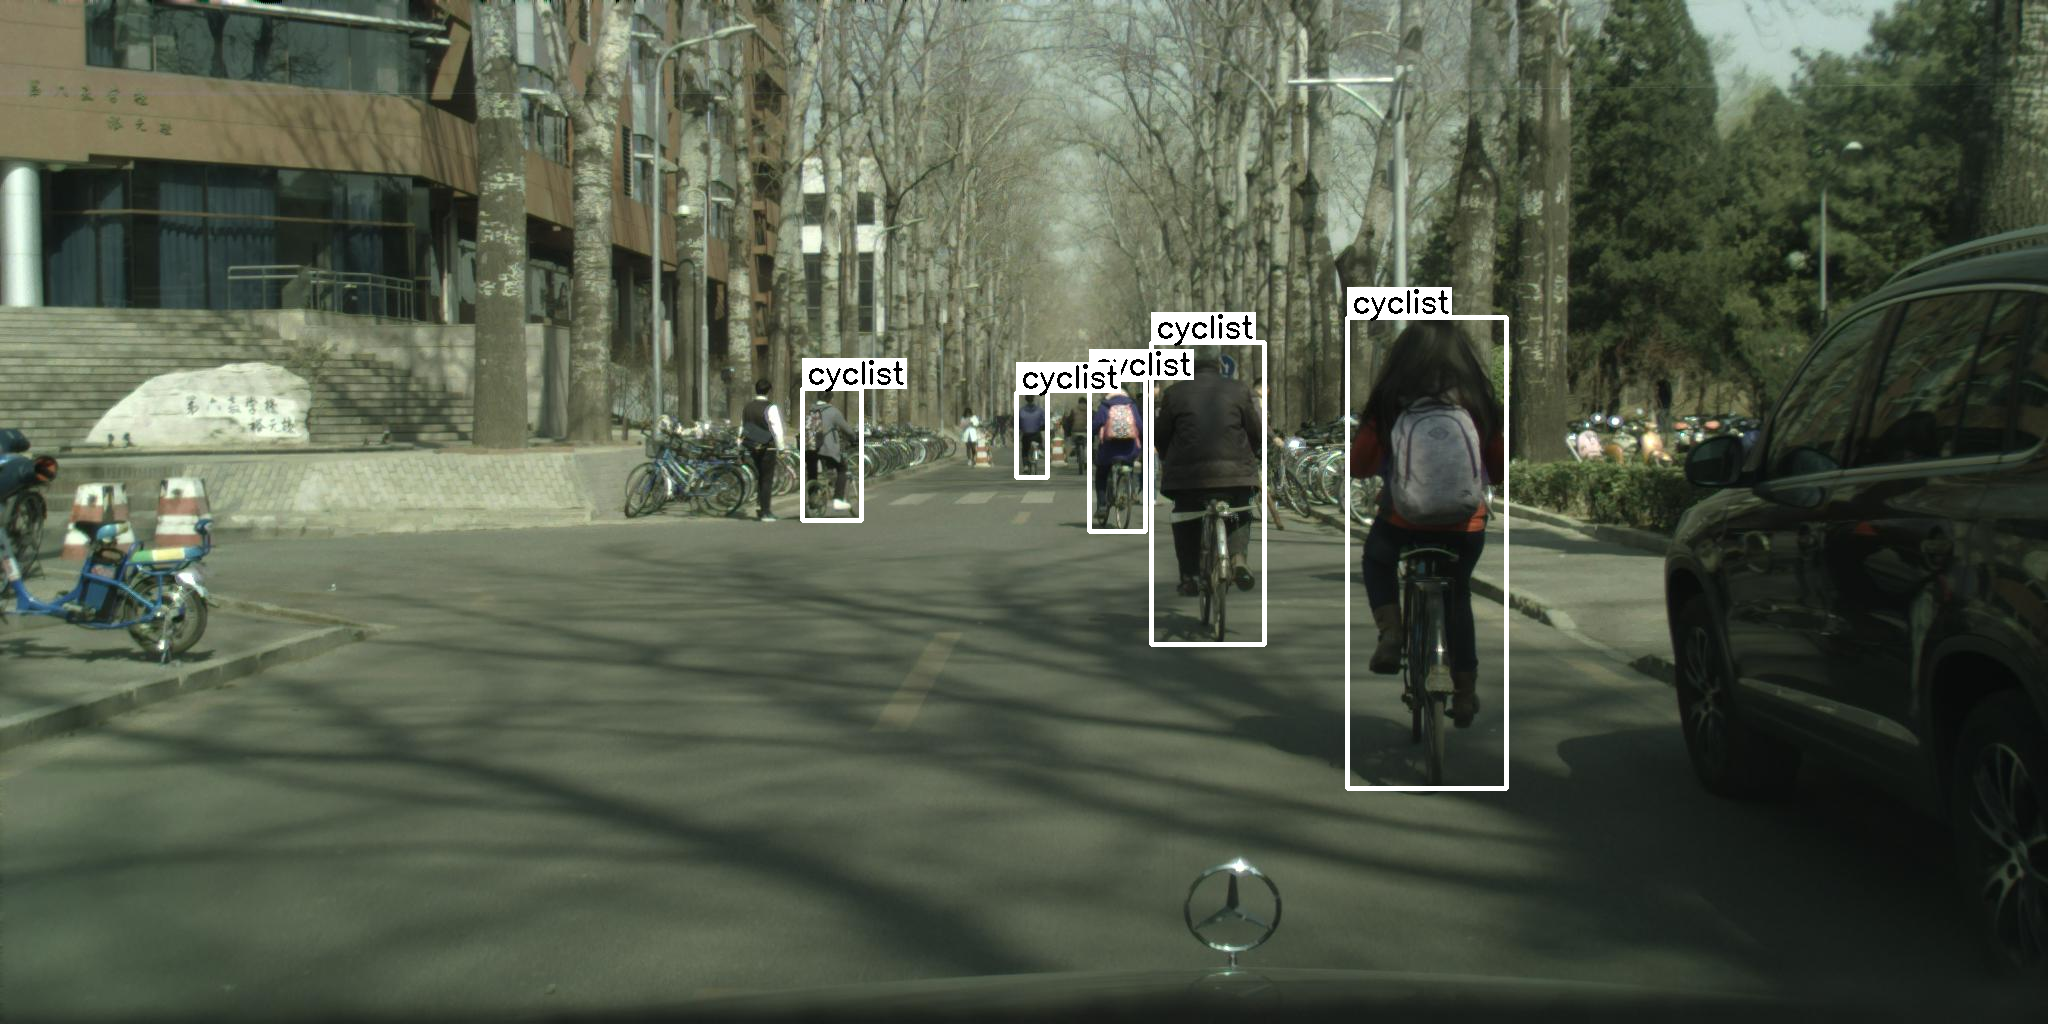

In [28]:
print("Sample from Train set:")
display(train_set.visualize.ShowBoundingBoxes(train_set.df.sample(1).img_id.values[0]))

Sample from Test set:


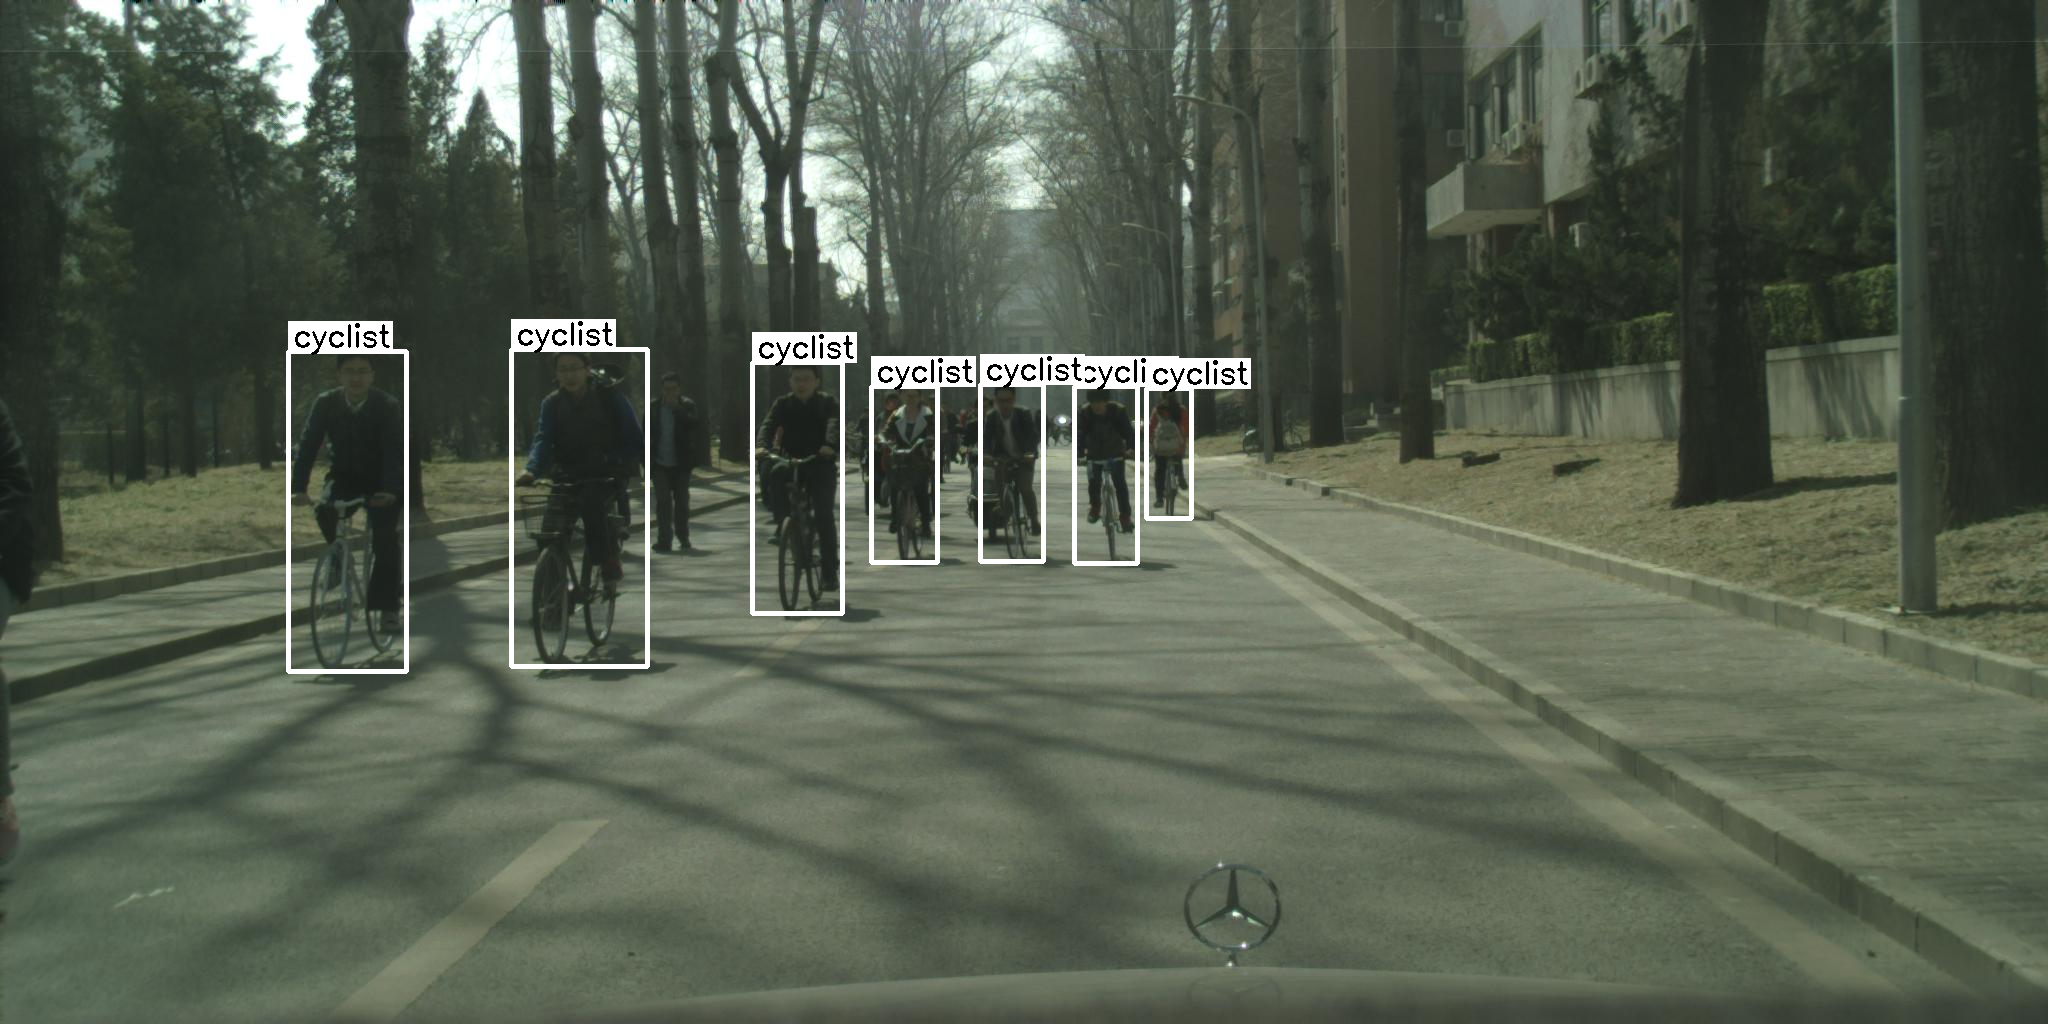

In [29]:
print("Sample from Test set:")
display(test_set.visualize.ShowBoundingBoxes(test_set.df.sample(1).img_id.values[0]))

Sample from Validation set:


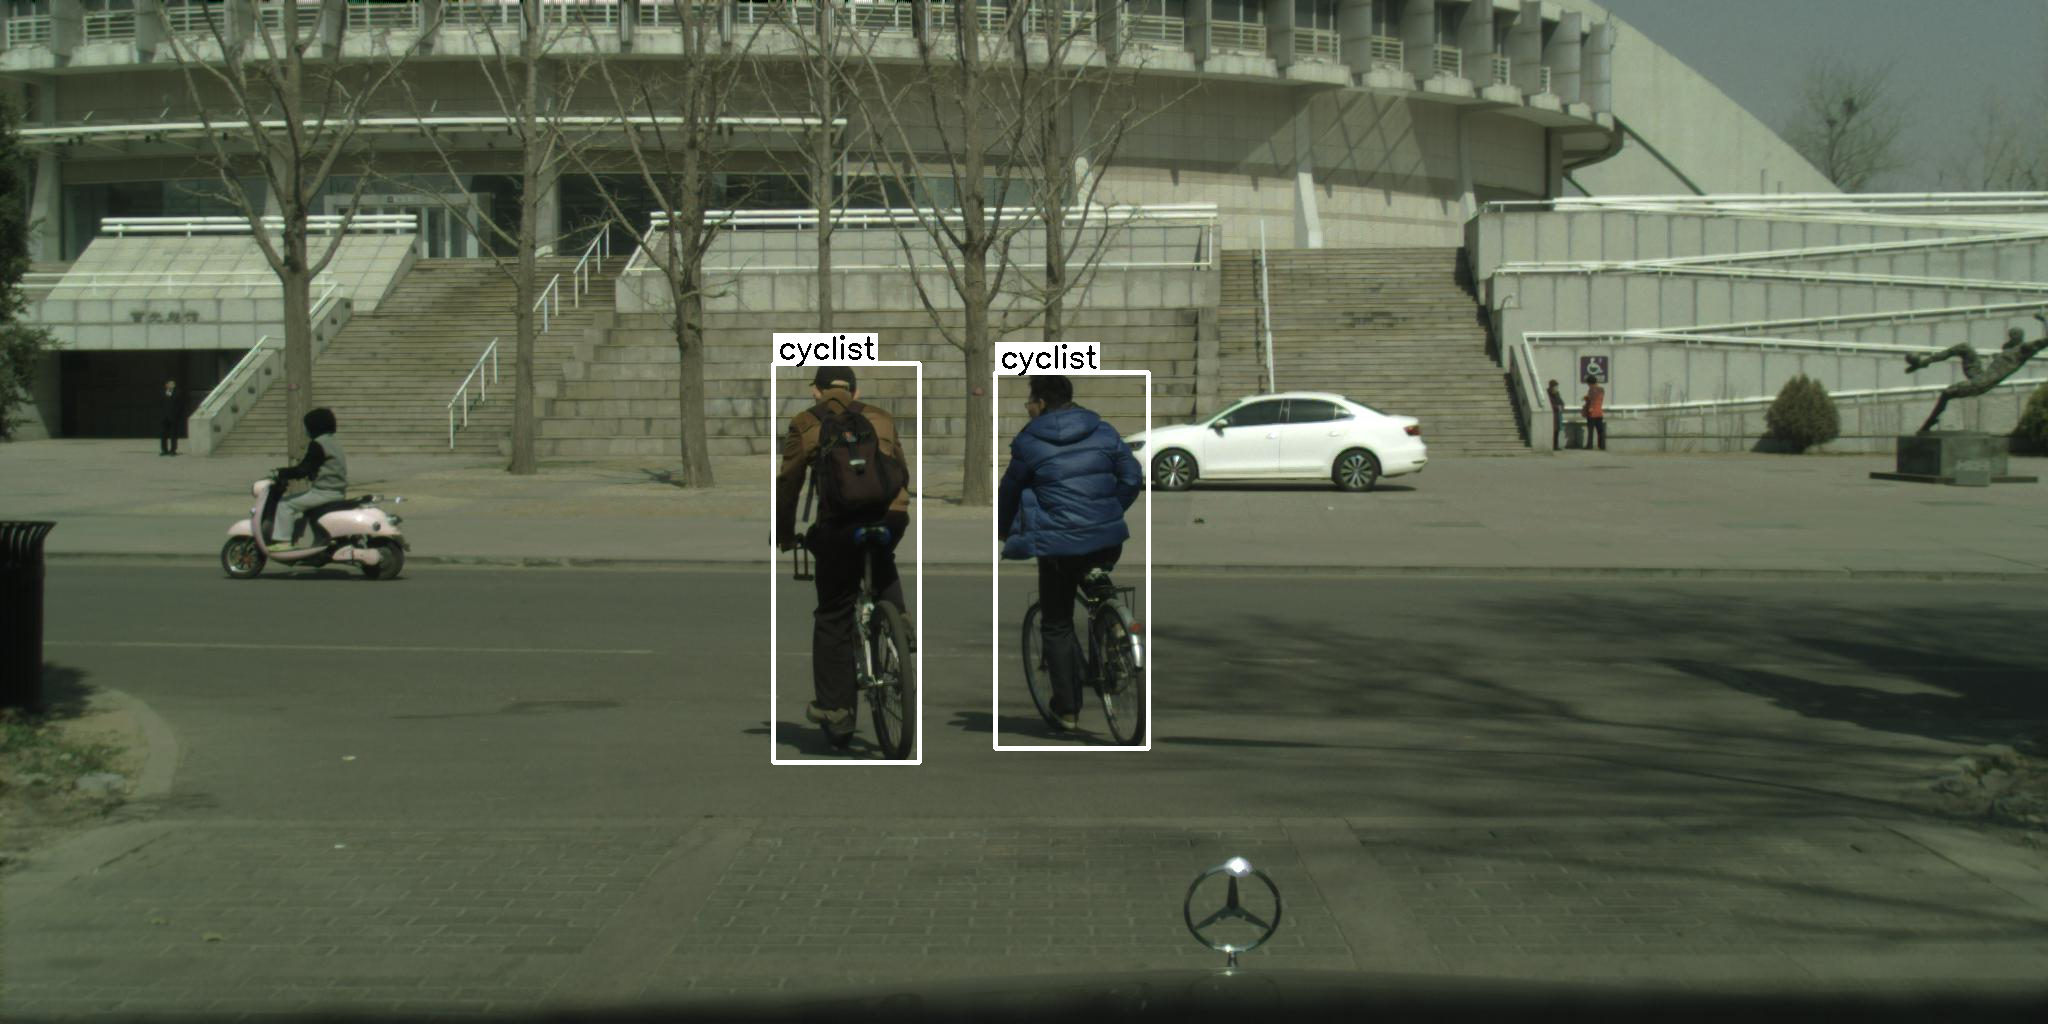

In [56]:
print("Sample from Validation set:")
display(validation_set.visualize.ShowBoundingBoxes(validation_set.df.sample(1).img_id.values[0]))

Seeing different samples from the dataset, we notice that the luminosity is always low with a yellow/green color. This will be countered thanks to data augmentation (see readme.md).

Now we know better our dataset and we are ready to move to the next step!